<a href="https://colab.research.google.com/github/balqozz/PCVK_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Praktikum

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


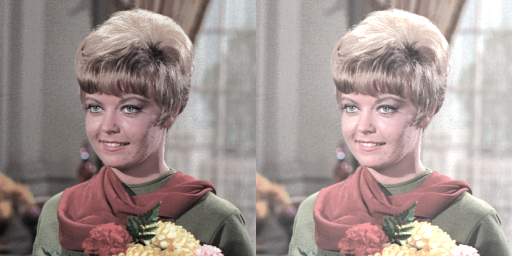

In [4]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/ladies.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas Praktikum 1

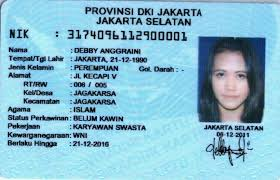

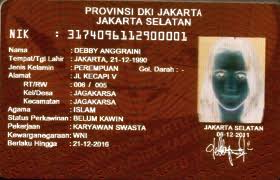

In [5]:
# Load the image
img = cv.imread('/content/drive/MyDrive/ktp.jpeg')

# Display the image using the correct variable name
cv2_imshow(img)

# Invert the colors
inverted_image = cv.bitwise_not(img)  # Use 'img' here as well
cv2_imshow(inverted_image)

# Tugas Praktikum 2

Mengubah kontras dan tingkat kecerahan citra
-------------------------------------------
Masukkan Tingkat kecerahan [-255 - 255]: 50
Masukkan Kontras [1.0 - 3.0]: 2


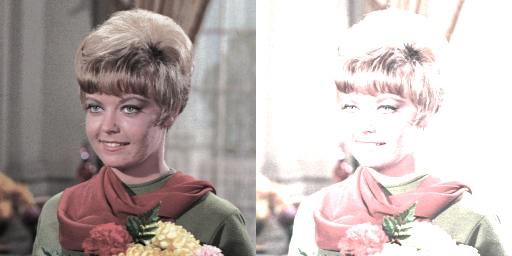

In [14]:
import cv2 as cv2  # Impor OpenCV
import numpy as np
from google.colab.patches import cv2_imshow  # Fungsi untuk menampilkan gambar di Colab

print('Mengubah kontras dan tingkat kecerahan citra')
print('-------------------------------------------')

# Ambil input kecerahan dari pengguna
try:
    brightness = int(input('Masukkan Tingkat kecerahan [-255 - 255]: '))
except ValueError:
    print('Error, bukan angka untuk kecerahan')
    brightness = 0  # Default jika ada kesalahan input

# Ambil input kontras dari pengguna
try:
    contrast = float(input('Masukkan Kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, bukan angka untuk kontras')
    contrast = 1.0  # Default jika ada kesalahan input

# Baca gambar
original = cv2.imread('/content/drive/MyDrive/ladies.jpeg')

# Cek jika gambar berhasil dibaca
if original is None:
    print('Error: Gambar tidak ditemukan atau path salah.')
else:
    # Terapkan kontras dan kecerahan pada gambar
    # alpha = contrast (pengganda untuk kontras), beta = brightness (penambah untuk kecerahan)
    adjusted_image = cv2.convertScaleAbs(original, alpha=contrast, beta=brightness)

    # Gabungkan gambar asli dan yang sudah diubah
    final_frame = cv2.hconcat([original, adjusted_image])

    # Tampilkan hasil
    cv2_imshow(final_frame)


# Tugas Praktikum 3

Mengubah tingkat kecerahan citra dengan transformasi log
-----------------------------------------------------------
Masukkan nilai kecerahan (c): 50


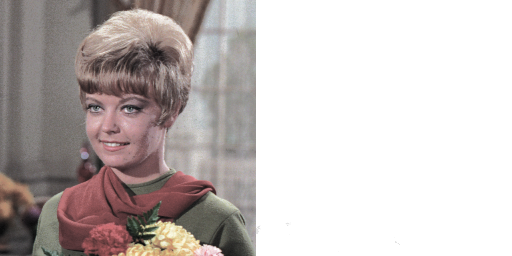

In [9]:
import numpy as np
import math

print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('-----------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan (c): '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/ladies.jpeg')
log_image = np.zeros(original.shape, dtype=np.uint8)

# Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for z in range(original.shape[2]):
      # Transformasi logaritmik
      new_value = c * math.log(1 + original[y, x, z])
      # Normalisasi nilai piksel
      new_value = int(new_value * 255 / math.log(1 + 255))
      # Batasi nilai piksel dalam rentang 0-255
      log_image[y, x, z] = np.clip(new_value, 0, 255)

final_frame = cv.hconcat((original, log_image))
cv2_imshow(final_frame)

# Tugas Praktikum 4

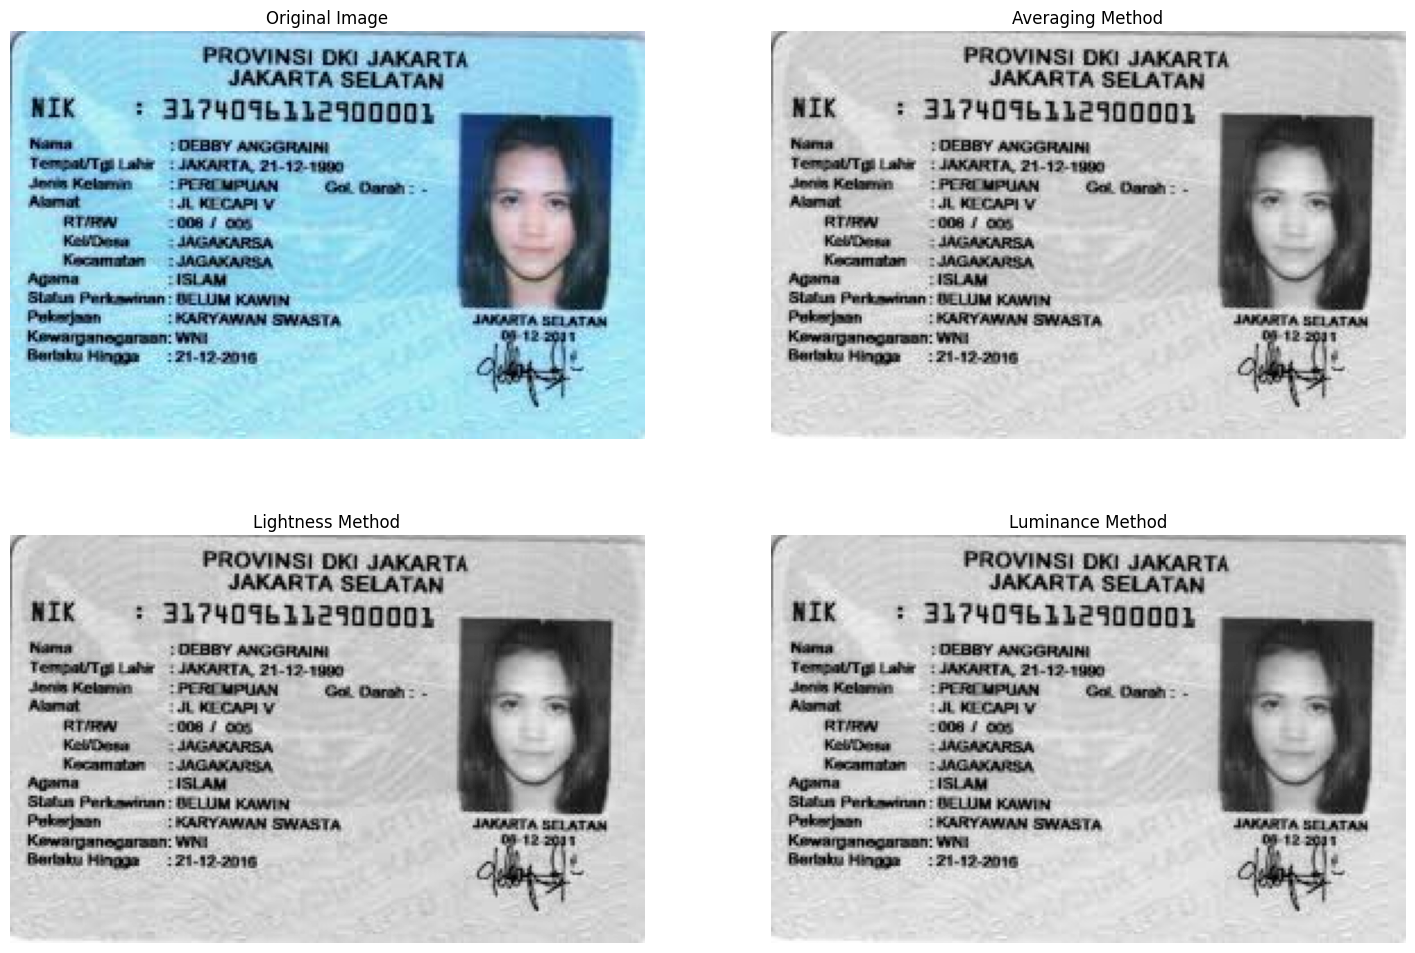

In [10]:
import numpy as np

# load image
img = cv.imread('/content/drive/MyDrive/ktp.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Averaging method
gray_avg = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    red = float(img[y, x, 0])
    green = float(img[y, x, 1])
    blue = float (img[y, x, 2]) # Changed () to [] to access array element
    gray_avg[y, x] = (red + green + blue)/3

# Lightness method
gray_lightness = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    red = float(img[y, x, 0])
    green = float(img[y, x, 1])
    blue = float (img[y, x, 2]) # Changed () to [] to access array element
    min_value = min(red, green, blue)
    max_value = max(red, green, blue)
    gray_lightness[y, x] = (min_value + max_value)/2

# Luminance method
gray_luminance = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    red = float(img[y, x, 0])
    green = float(img[y, x, 1])
    blue = float (img[y, x, 2]) # Changed () to [] to access array element
    gray_luminance[y, x] = 0.2126 * red + 0.7152 *green + 0.0722 * blue

# display the original and grayscale side by side
plt.figure(figsize=(18, 12))

# original image
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Averaging method
plt.subplot(2, 2, 2)
plt.imshow(gray_avg, cmap='gray')
plt.title('Averaging Method')
plt.axis('off')

# Lightness method
plt.subplot(2, 2, 3)
plt.imshow(gray_lightness, cmap='gray')
plt.title('Lightness Method')
plt.axis('off')

# Luminance Method
plt.subplot(2, 2, 4)
plt.imshow(gray_luminance, cmap='gray')
plt.title('Luminance Method')
plt.axis('off')

plt.show()

# Tugas Praktikum 5

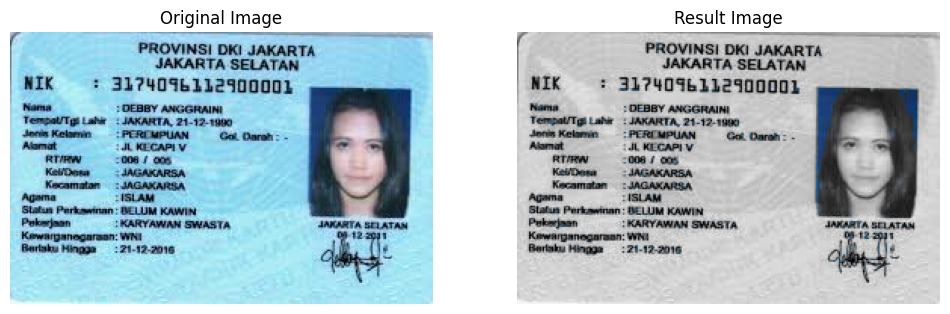

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# load image
img = cv.imread('/content/drive/MyDrive/ktp.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Detecting vlue color
lower_blue = np.array([0, 0, 100])
upper_blue = np.array([100, 100, 255])

# Create a mask
mask = cv.inRange(img, lower_blue, upper_blue)

# Grayscale using luminance method
gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
gray_3channel = cv.cvtColor(gray_img, cv.COLOR_GRAY2RGB)

# REsult img non-blue areas
result_img = np.where(mask[:, :, np.newaxis] == 255, img, gray_3channel)

# Display original and result
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Result image
plt.subplot(1, 2, 2)
plt.imshow(result_img)
plt.title('Result Image')
plt.axis('off')

plt.show()